# 泰坦尼克号-数据挖掘案例解读

## 1. 数据挖掘流程

### 1.1. 数据读取

- 读取数据，并进行展示
- 统计数据各项指标
- 明确数据规模与要完成的任务

### 1.2. 特征理解分析

- 单特征分析，逐个变量分析其对结构的影响
- 多变量统计分析，综合考虑多种情况影响
- 统计绘图得出结论

### 1.3. 数据清洗与预处理

    最重要！数据决定了模型的上限，而算法负责逼近这个上限。

- 对缺失值进行填充
- 特征标准化/归一化
- 筛选有价值的特征
- 分析特征之间的相关性

### 1.4. 建立模型

- 特征数据与标签准备

    有监督（有标签）和无监督。
    

- 数据集切分
- **多种建模算法对比**
- 集成策略等方案改进

## 2. Python兵器库介绍

### 2.1. Numpy

科学计算库，主要用来做矩阵运算。

底层是 ndarray。

官网：https://numpy.org/

### 2.2. Pandas

数据分析处理库。

底层是 DataFrame，DataFrame 的底层是 series，Series 的底层是 ndarray，所以 **Pandas 是对 Numpy 的封装**。

官网：https://pandas.pydata.org/

### 2.3 Matplotlib

可视化库。

官网：https://matplotlib.org/

### 2.4. Seaborn

更简单的可视化库，封装在 Matplot 基础上。

官网：https://seaborn.pydata.org/

### 2.5. Scikit-Learn

机器学习库。包含了基本上你觉得能用上的所有机器学习算法。

还有很多预处理和评估的模块等你来挖掘！

## 3. sklearn库介绍

    官网：https://scikit-learn.org/stable/
    
![sklearn.png](./sklearn.png)

### 两个重要参考
**API地址：https://scikit-learn.org/stable/modules/classes.html** （）

**Examples地址：https://scikit-learn.org/stable/auto_examples/index.html** （可以参考可视化模板）

## 4. 数据读取与统计分析

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [186]:
data = pd.read_csv('./titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
data.shape

(891, 12)

#### 瞅一瞅有没有缺失值

In [188]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 整体看看数据

In [189]:
data.describe()  # 只有数值型的列才能describe，即求均值、标准差、最大值、最小值等

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 看看获救比例咋样

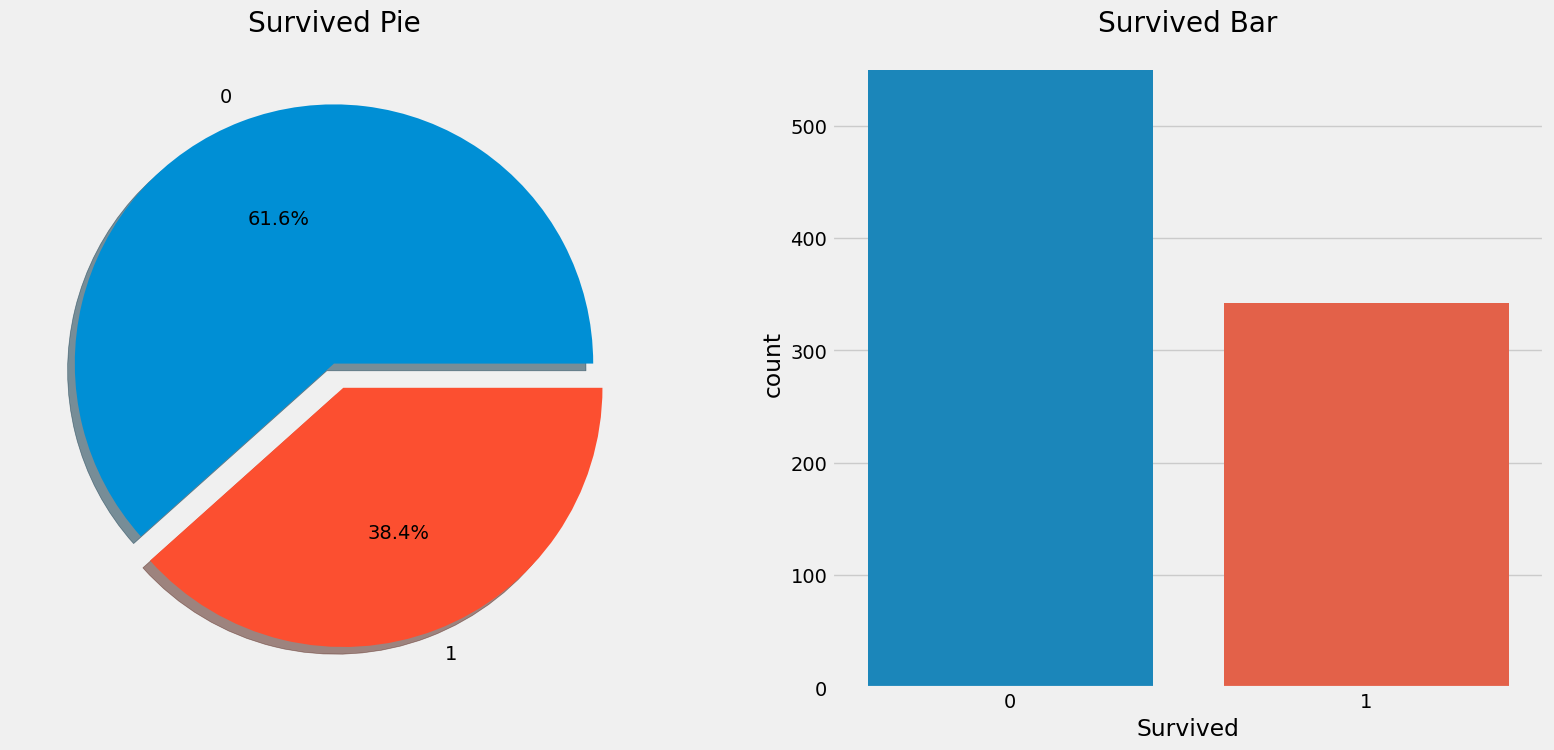

In [190]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 饼图画到 ax[0]
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived Pie')
ax[0].set_ylabel('')

# 柱状图画到 ax[1]
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived Bar')
plt.show()

在训练集的891名乘客中，只有38.4%的乘客幸存了下来。

我们需要从数据中挖掘出更多的信息，看看哪些类别的乘客幸存下来，哪些没有。

我们将尝试使用数据集的不同特性来检查生存率，比如性别、年龄、登船地点等，但是首先我们得理解下数据中的特征。

## 5. 性别特征分析

### 数据特征分为：离散值和连续值

- 离散值：性别（男，女）、登船地点（S, Q, C）
- 连续值：年龄，船票价格

In [191]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [192]:
data.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

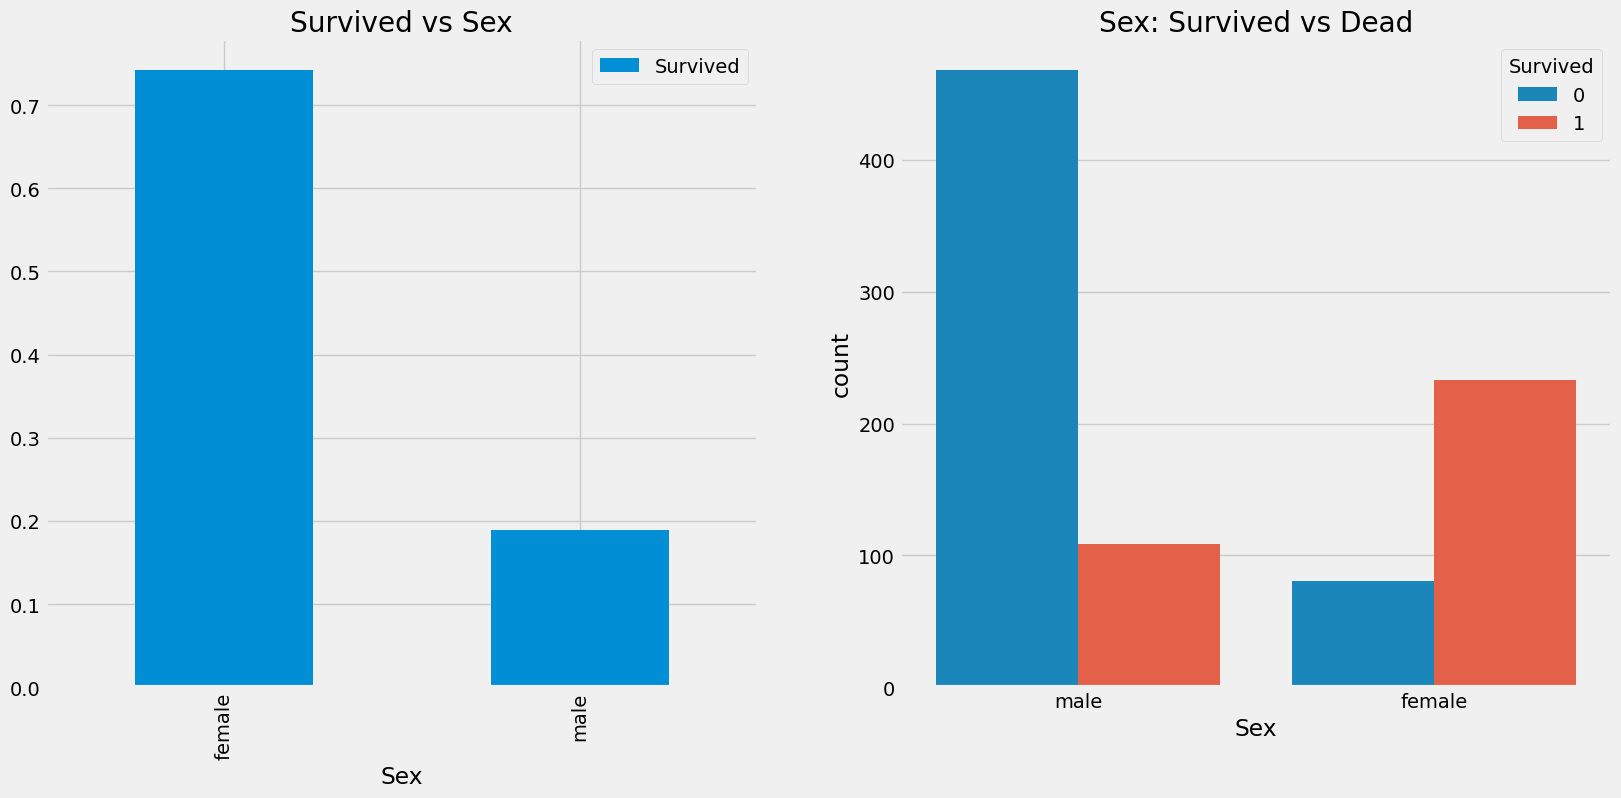

In [193]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 求不同性别下，Survived的平均值，值越大，获救的人越多
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 求不同性别下，获救和未获救的人数
sns.countplot(x='Sex', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

这看起来很有趣，船上的男人比女人多得多，不过，挽救的女性人数几乎是男性的两倍。

生存率，女人是75%左右，男人是18%左右。

这些看起来是建模非常重要的特性，一会儿会用上的。

### 6. 船舱等级（Pclass）特征分析

In [194]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


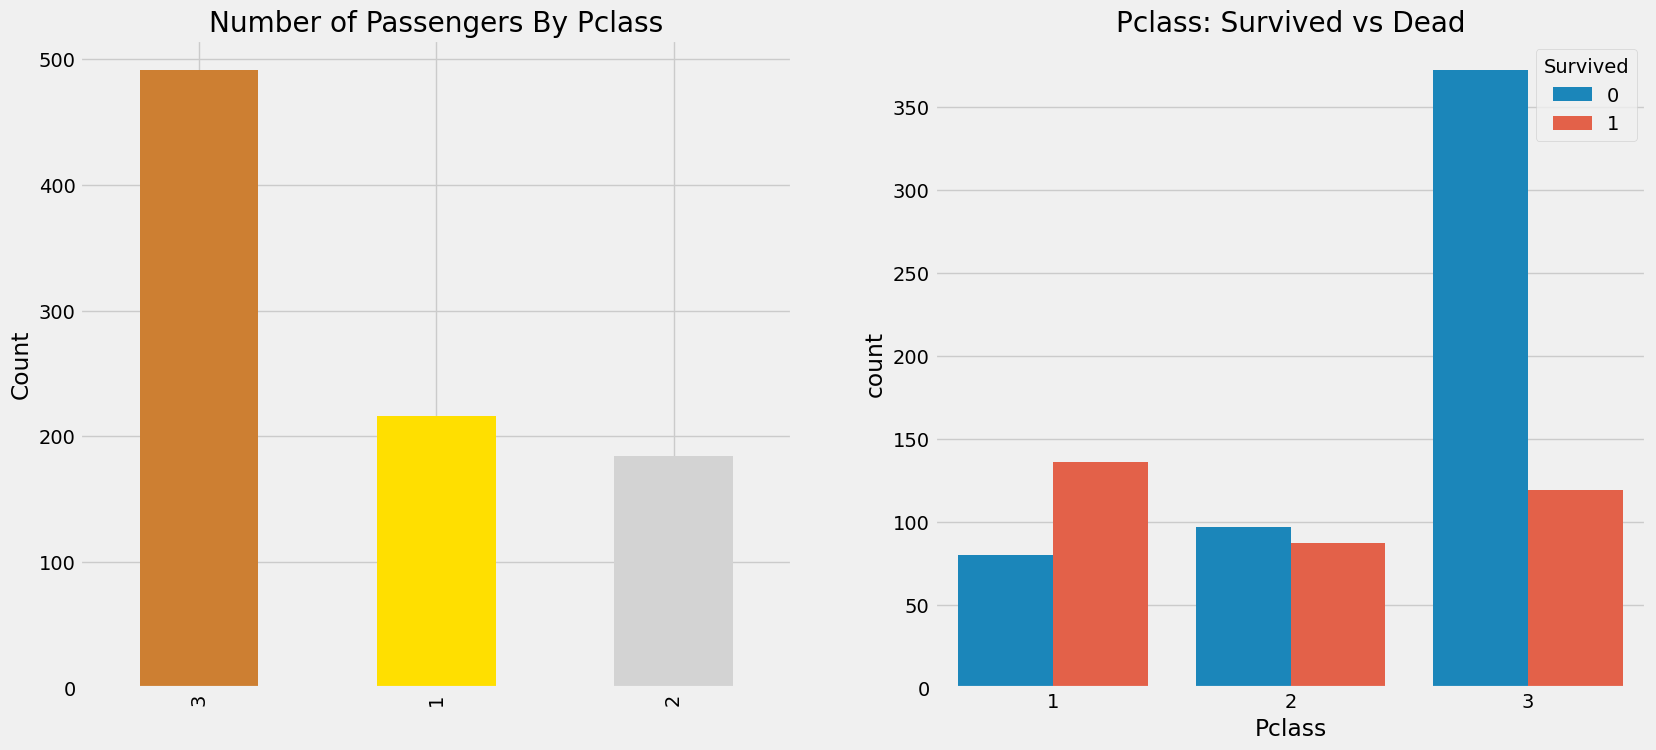

In [195]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

对于 Pclass=1 来说，获救率是 63% 左右，对于 Pclass=2，获救率是 48% 左右，而对于 Pclass=3，获救率只有25%，可以看出船舱等级对获救与否影响很大。

那这些又和性别有关吗？

In [196]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

可知，不仅总体上女性获救概率高，而且在头等舱和中等舱中女性被获救的概率更高；

同样，虽然总体上男性获救概率低，但在头等舱中，男性获救概率可以达到 45/（45+77）= 36.8%。

**通过 catplot 可以明显看出船舱等级和性别对获救与否的影响。**

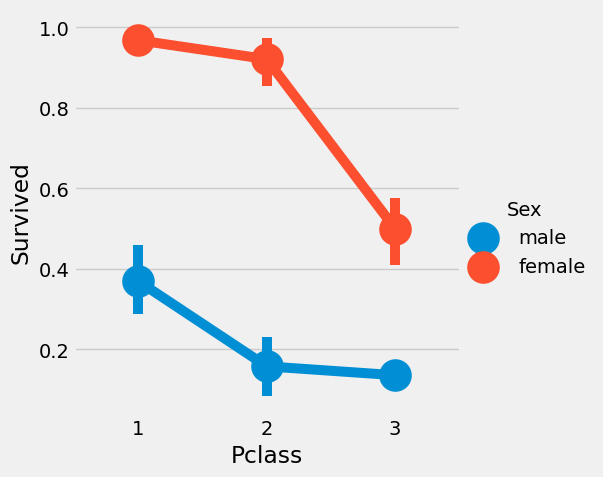

In [197]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')

## 7. 缺失值问题

In [198]:
print('Oldest age was ', data['Age'].max())
print('Youngest age was ', data['Age'].min())
print('Average age was ', data['Age'].mean())

Oldest age was  80.0
Youngest age was  0.42
Average age was  29.69911764705882


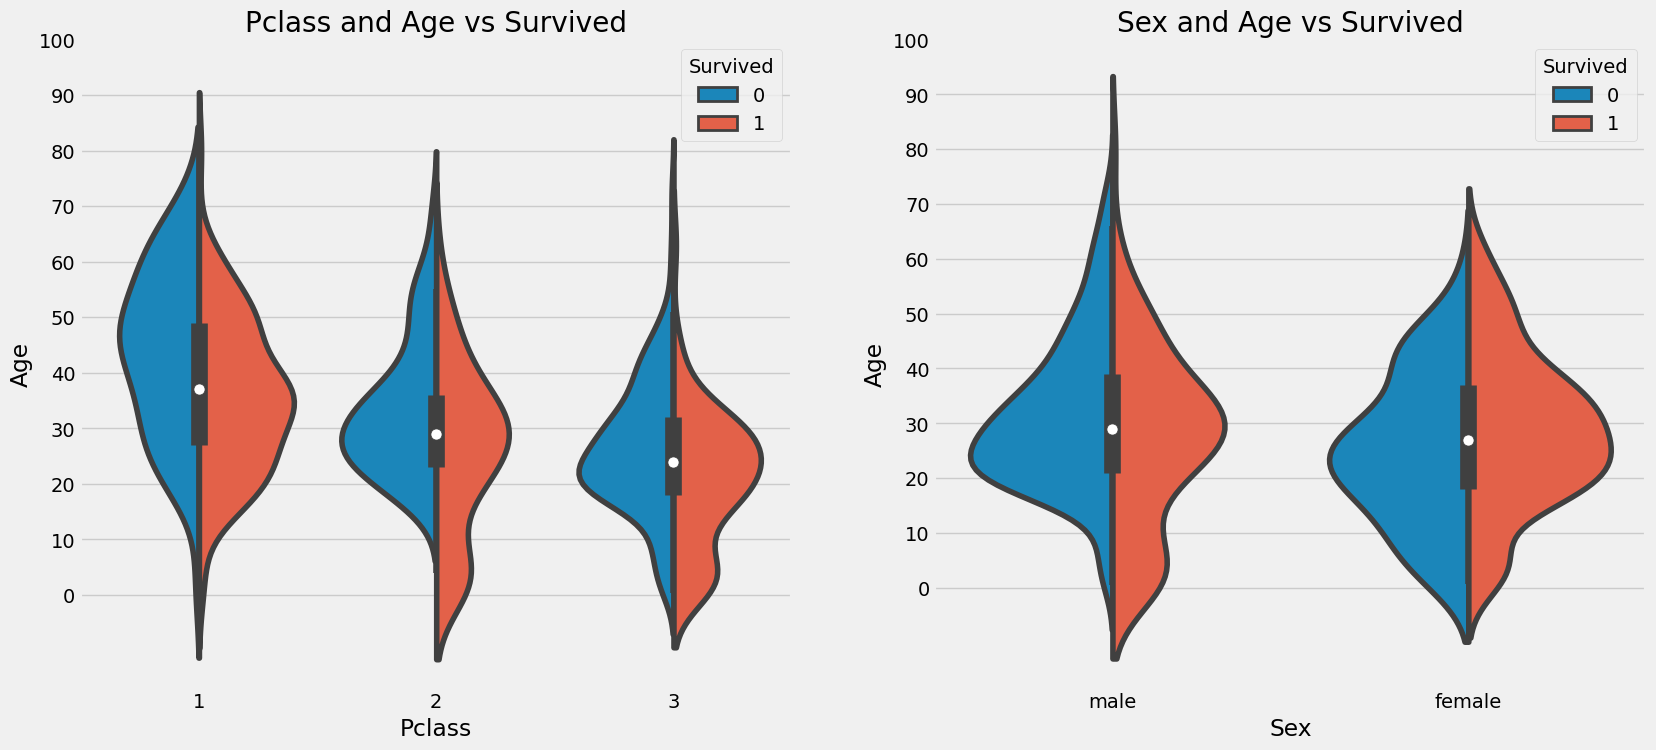

In [199]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### 缺失值填充

- 平均值
- 经验值
- 回归模型预测
- 剔除掉

我们可以检查名字特征，根据这个特征，名字中有先生或夫人这样的称呼的，就可以把先生和夫人的平均值分配给各自的组。

In [200]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')  # 按正则表达式提取信息
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [201]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [202]:
# 将出现频率很少的称谓全部替换成 other
data['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'], 'other', inplace=True)
# 求每一种称谓的平均年龄
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [203]:
# 使用每组的均值来填充空值
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='other'), 'Age'] = 43

In [204]:
data.Age.isnull().any()  # age没有空值了

False

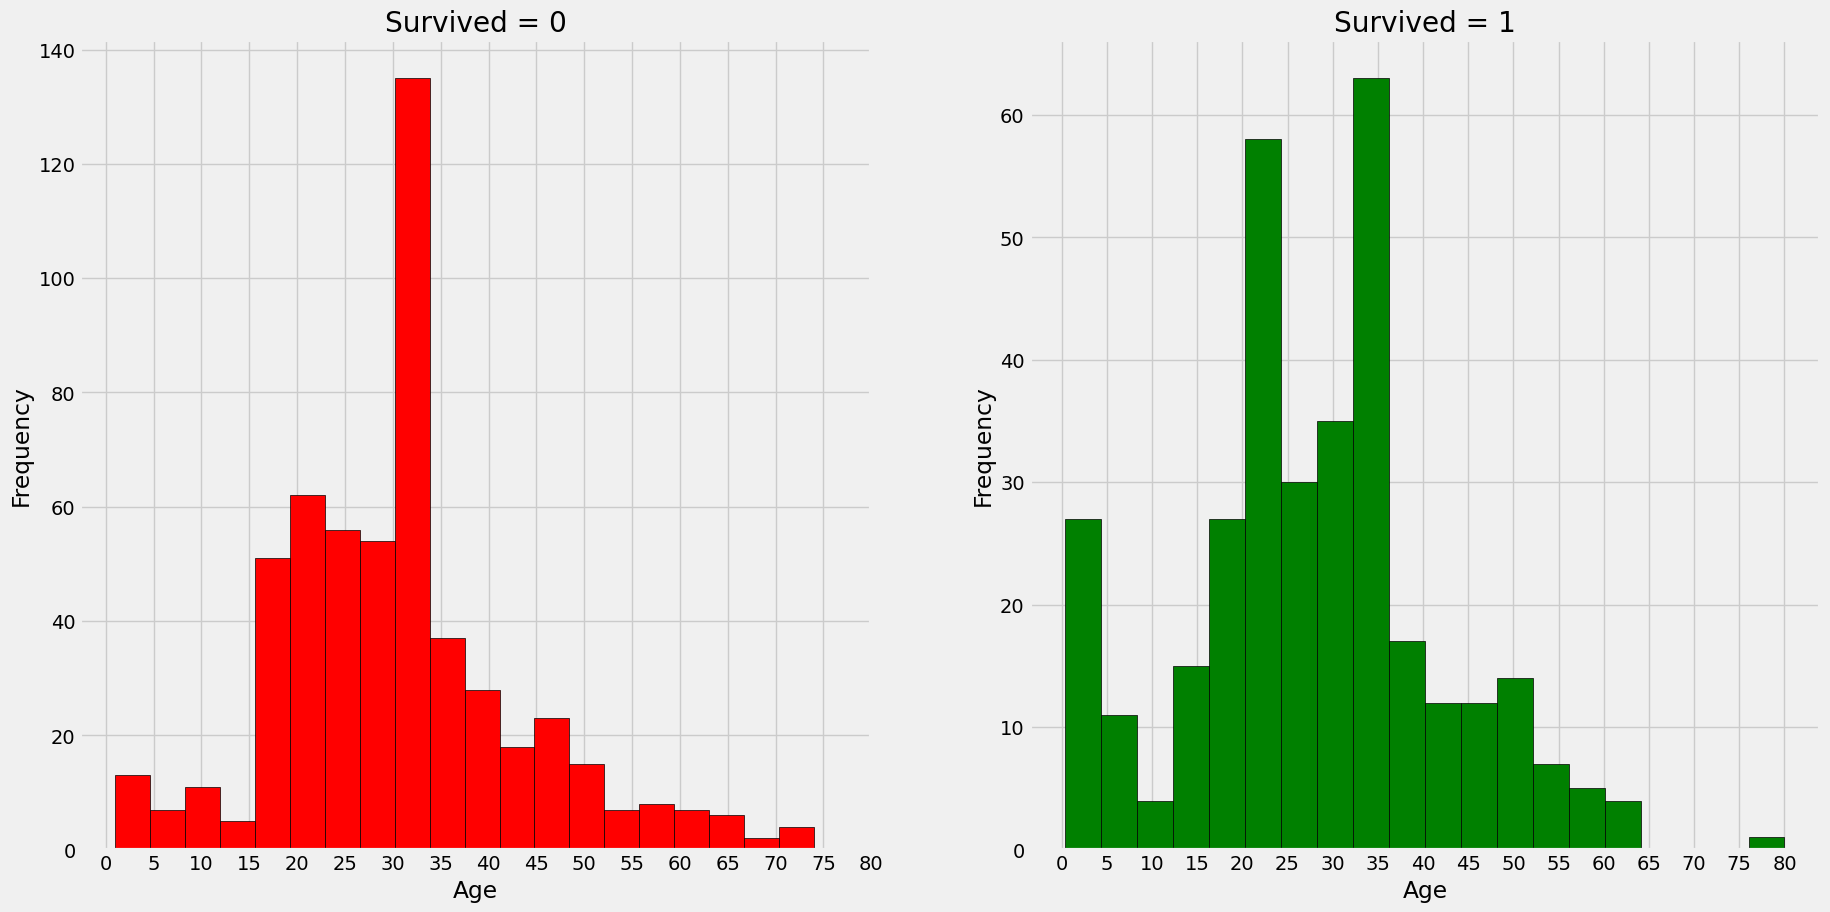

In [205]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 画 年龄-死亡人数的直方图
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
ax[0].set_xlabel('Age')

# 画 年龄-获救人数的直方图
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
ax[1].set_xlabel('Age')

plt.show()

观察：

1） 幼儿（5岁以下）获救的还是蛮多的（妇女和儿童优选上船）；

2） 最老的乘客获救了（80岁）；

3） 死亡人数最高的是30-35年龄组。

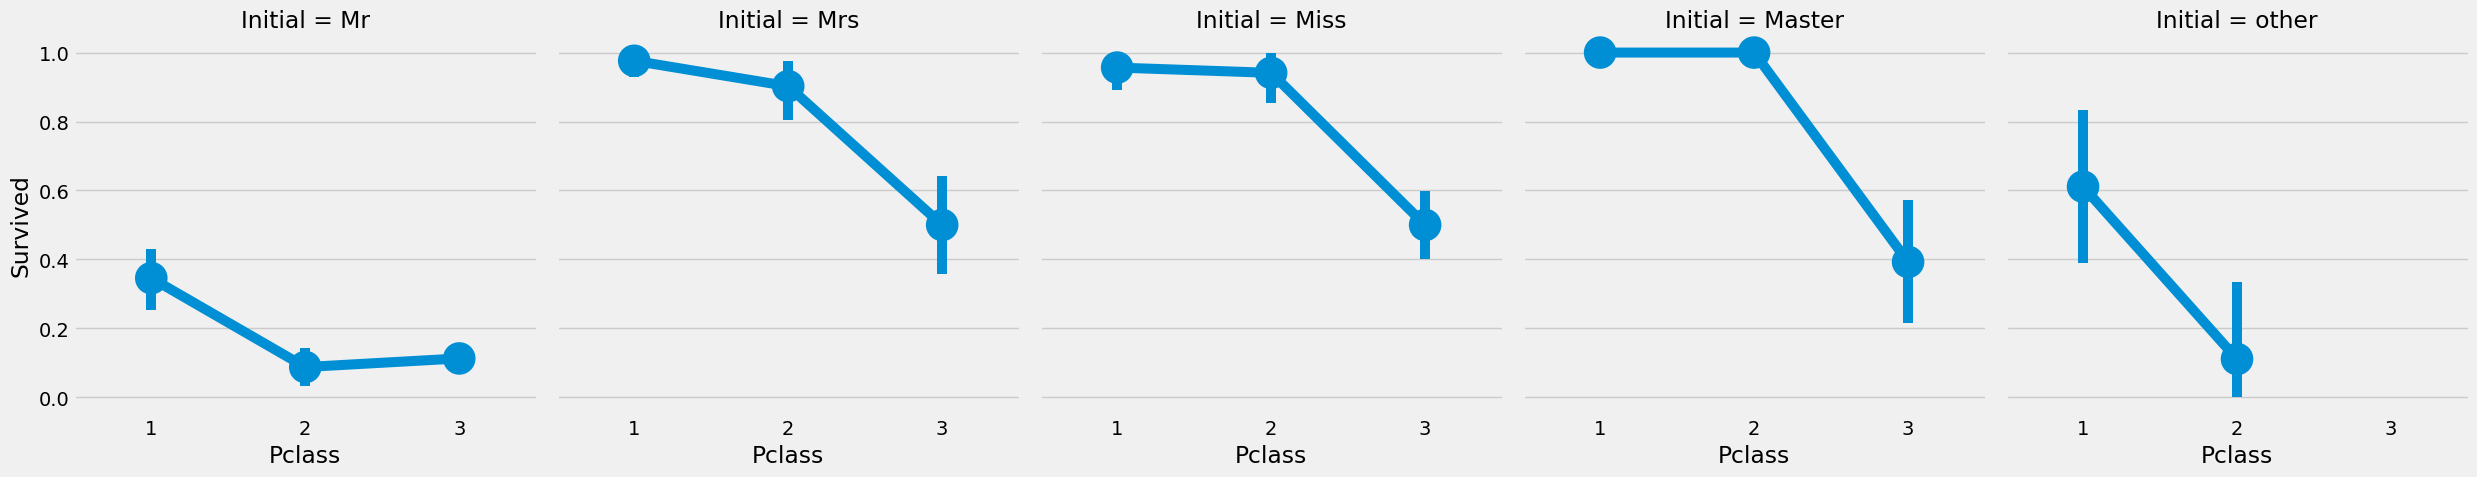

In [206]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')

## 8. 登船地点特征分析

In [207]:
# 画交叉表，横轴有 Embarked 和 Pclass，纵轴有 Sex 和 Survived
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

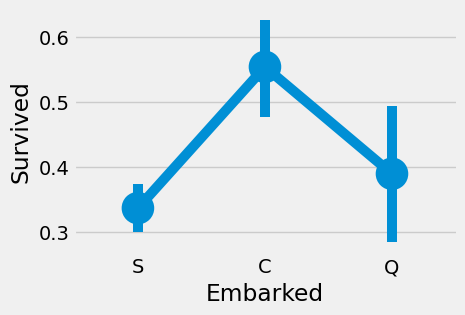

In [208]:
# 看下不同登船点的获救机率
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

可知，C港生存几率最高，S港生存几率最低。

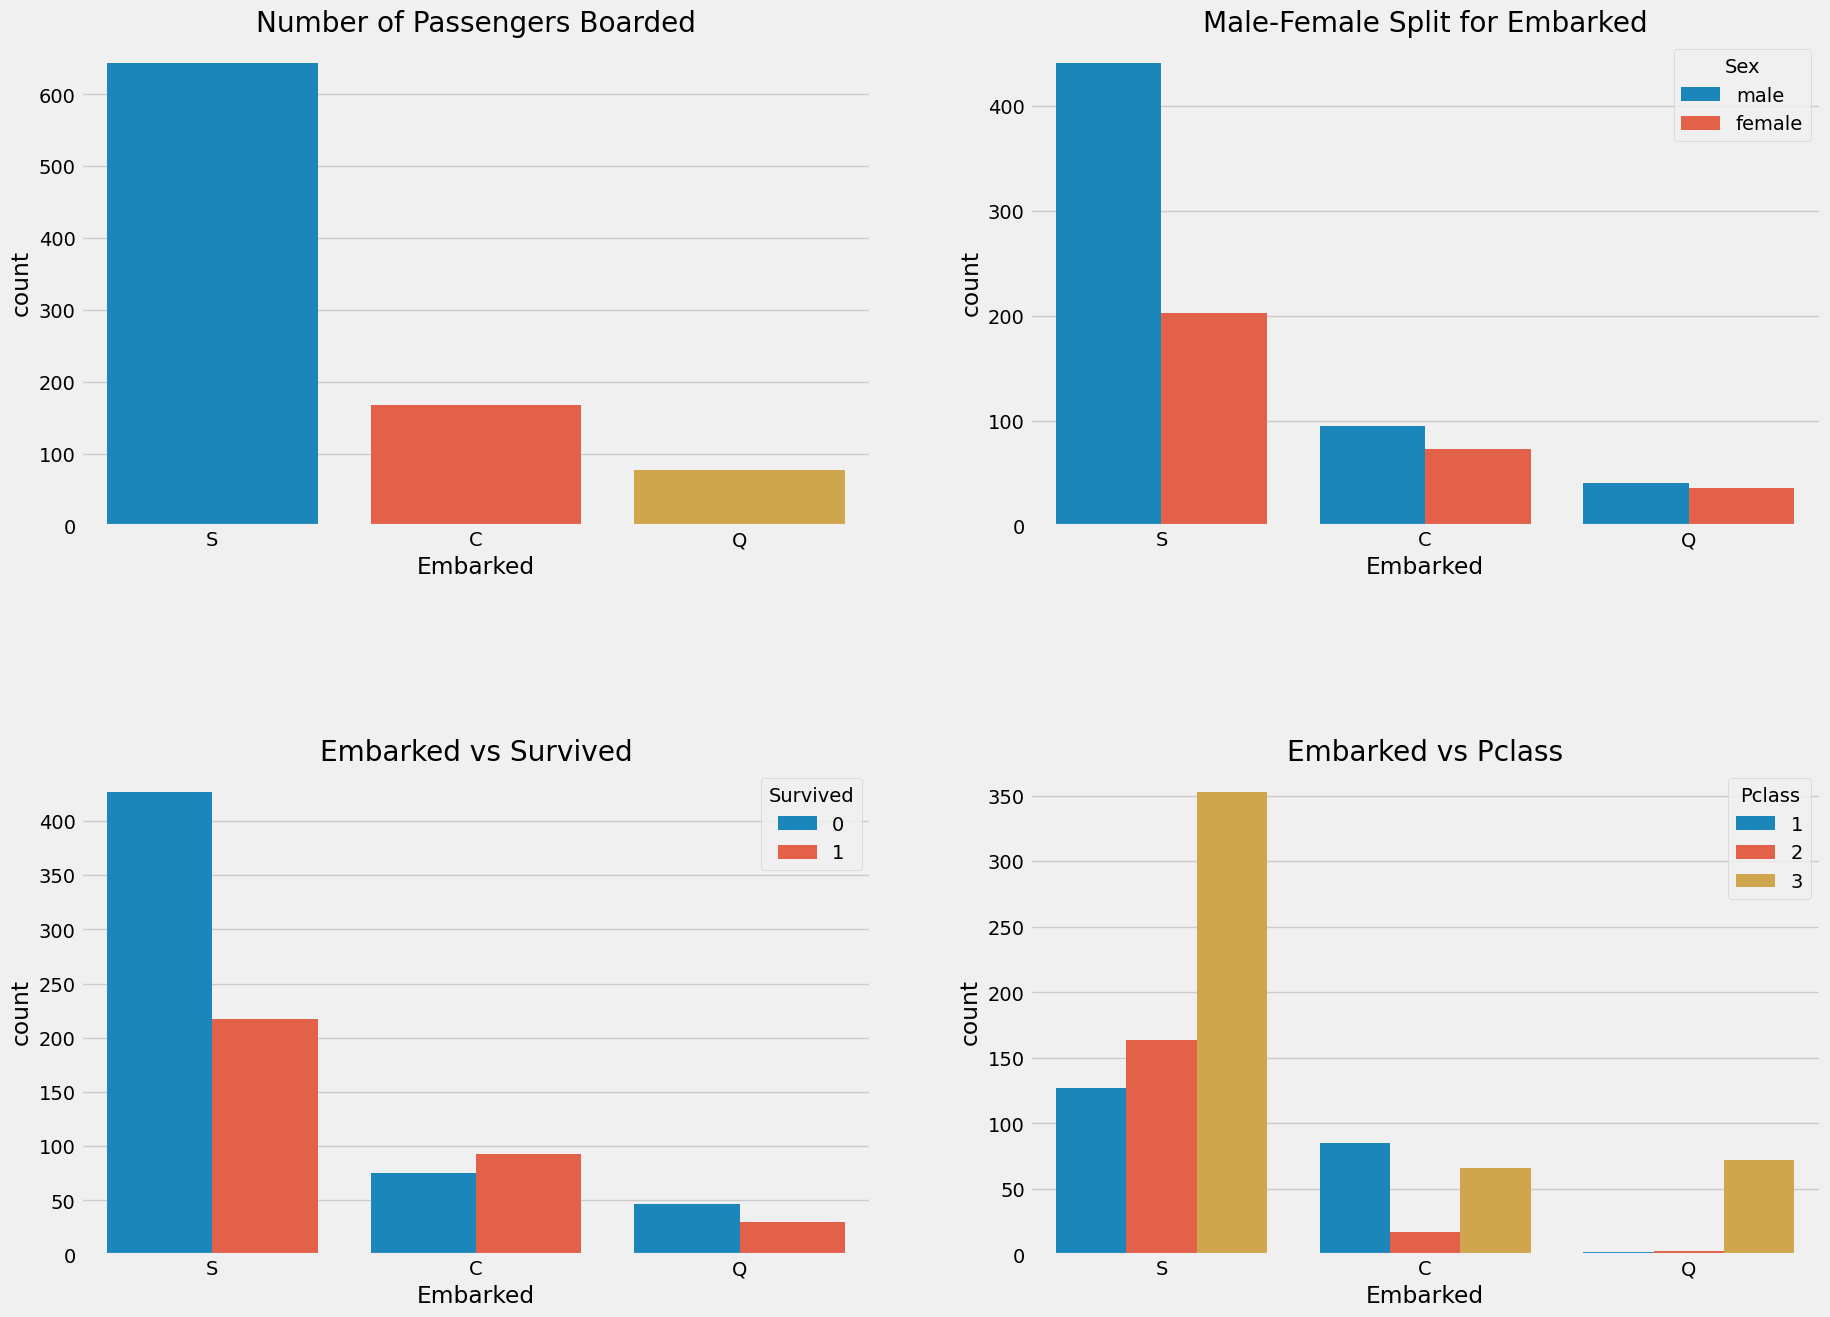

In [209]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 第一个图：各个港口的登船人数
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Number of Passengers Boarded')

# 第二个图：各个港口不同性别登船人数
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

# 第三个图：各个港口的获救/遇难人数
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# 第四个图：各个港口的不同船舱等级的人数
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

观察：

1） 大部分人的床仓等级是3；

2） C港乘船的乘客看起来很幸运，他们中的一部分幸存了下来；

3） S港乘船的乘客中富人（Pclass=1）挺多的，但生存的机会还是很低；

4） Q港几乎95%的乘客都是穷人（Pclass=3）。

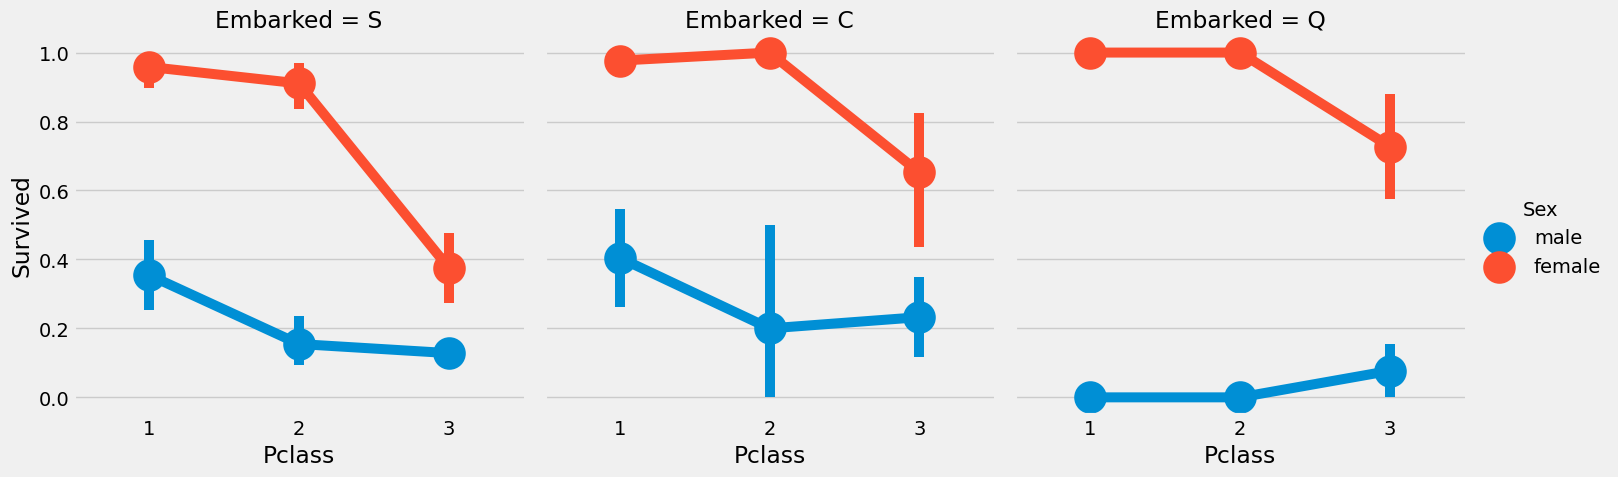

In [210]:
# 画 折线图
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')

观察：

1） 在 Pclass=1和2中，女性存活率几乎为1；

2） Pclass=3 的乘客中，男性和女性的存活率都很低；

3） Q港很不幸，因为几乎都是3等舱的乘客。

### 登船地点也有缺失值

使用众数来填充，因为 S港登船人数最多。

In [211]:
data['Embarked'].fillna('S', inplace=True)

In [212]:
data.Embarked.isnull().any()

False

## 9. 家庭特征分析

**sibsip**： 兄弟姐妹的数量

这个特征表示该乘客是独自一人，还是与他的家人在一起。

In [213]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


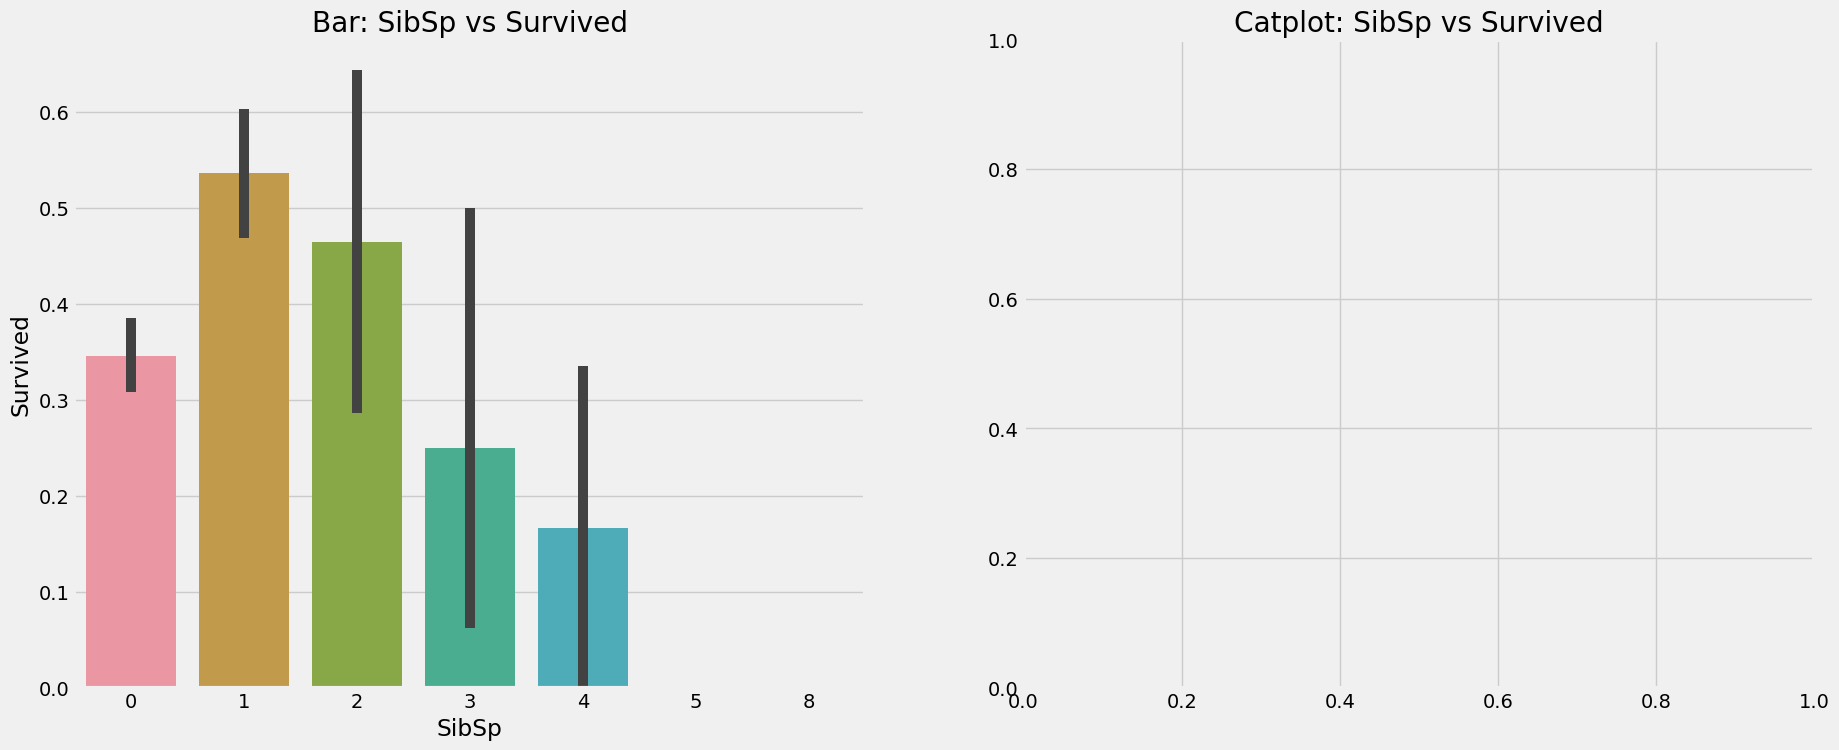

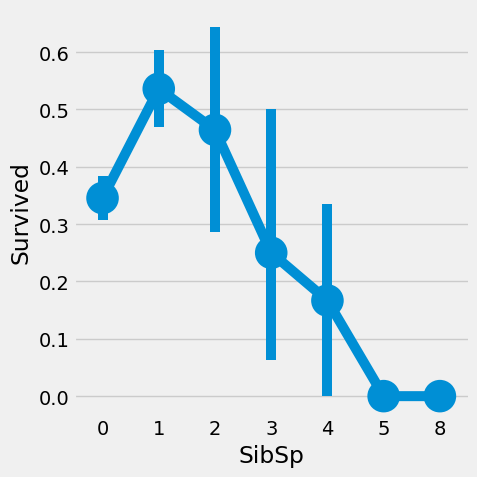

In [214]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Bar: SibSp vs Survived')

sns.catplot(x='SibSp', y='Survived', data=data, ax=ax[1], kind='point')
ax[1].set_title('Catplot: SibSp vs Survived')

plt.show()

In [215]:
观察：

barplot 和 catplot 表明，如果乘客是一个人在船上，没有兄弟姐妹，他有 34.5% 的存活率；

随着兄弟姐妹的数量增加，存活率先短暂升高，随后一直下降；

5-8名成员家庭的存活率为0%，原因可能是他们都在3等舱。

SyntaxError: invalid character '：' (U+FF1A) (2926628509.py, line 1)

In [216]:
# 考虑船舱等级
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**parch** : 父母和孩子的数量

In [217]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Catplot: Parch vs Survived')

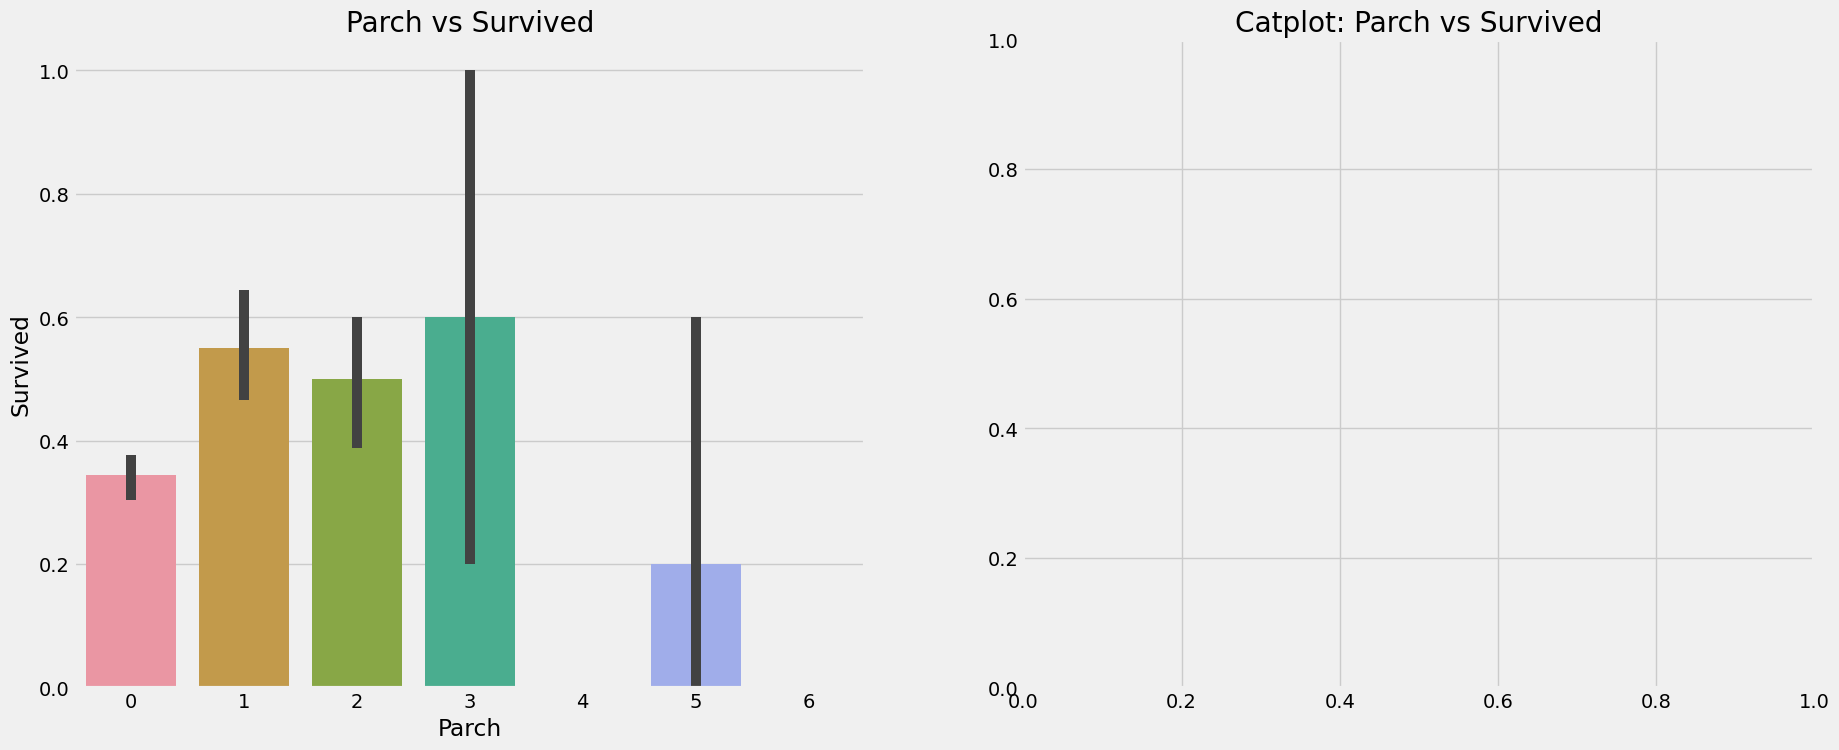

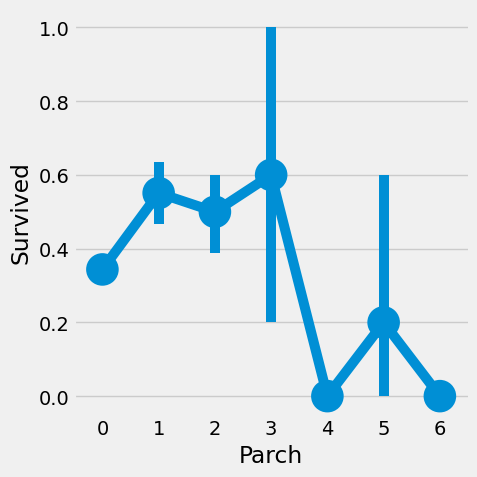

In [218]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch', y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.catplot(x='Parch', y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Catplot: Parch vs Survived')

**Fare**: 船票价格

In [219]:
print('Highest Fare: ', data['Fare'].max())
print('Lowest Fare: ', data['Fare'].min())
print('Average Fare: ', data['Fare'].mean())

Highest Fare:  512.3292
Lowest Fare:  0.0
Average Fare:  32.204207968574636


Text(0.5, 1.0, 'Fares in Pclass 3')

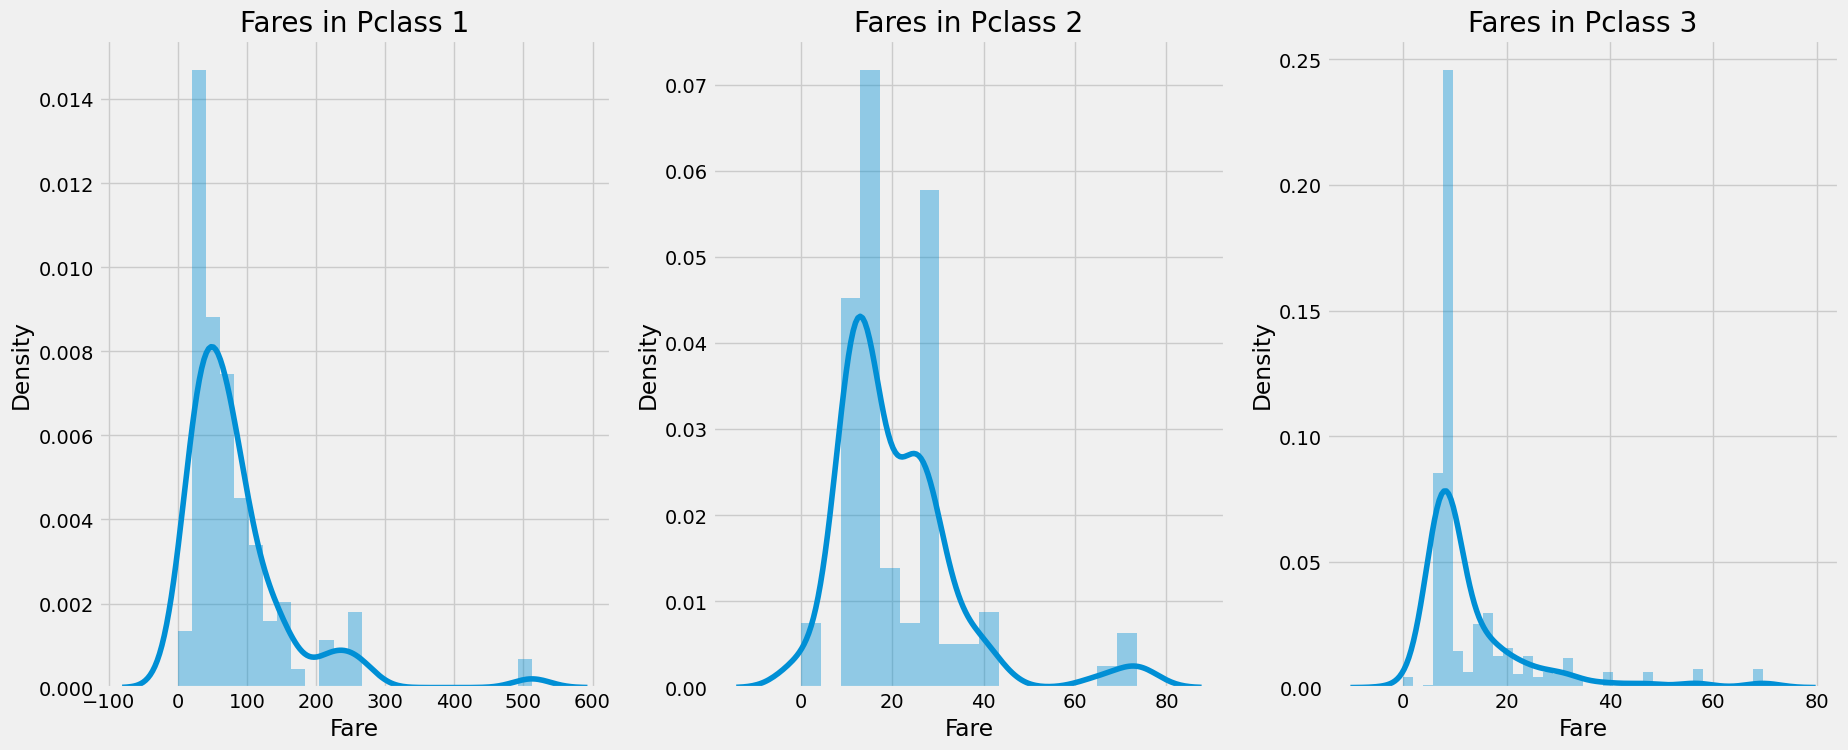

In [220]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

观察：

1） 1等舱的船票价格最高

2） 每种舱室中，票价最低的票买的人最多。

### 概括地观察所有的特征

- 性别：女性的生存机会更高
- Pclass: 1等舱有更好的生存机会；3等舱生存机会很低；对于女性来说，在1等舱中存活率为100%
- 年龄：5-10岁的儿童存活率高，15-35岁之间的乘客死亡率很高
- 港口：不同港口登船的，死亡率不同
- 家庭：有1-2个兄弟姐妹就、配偶或父母随行，有更大的概率存活

## 10. 特征相关性

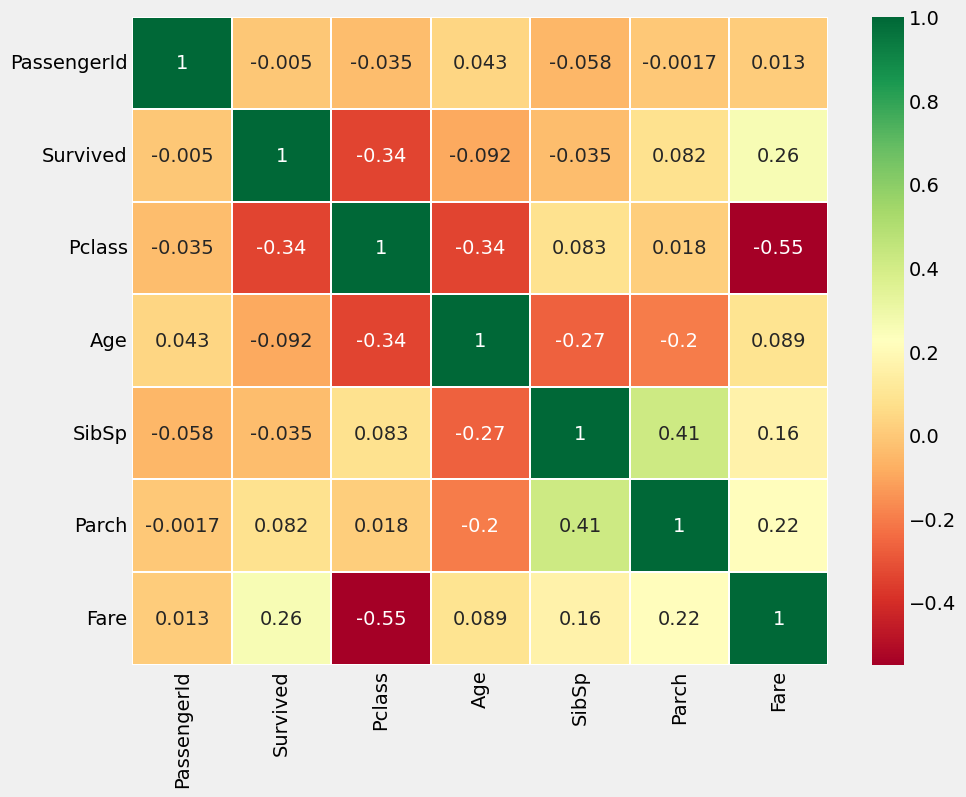

In [221]:
# 通过热度图可视化相关性
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- 只有数值特征可以计算相关性
- **在训练模型时，应该尽量减少冗余特性**，强正相关的特征只保留一个就行，可以减少训练时间

## 11. 构建特征（特征工程）

### 年龄

年龄是连续值，如果有50个人，可能就会有50个年龄，我们可以对连续值进行离散化来分组。

乘客的最大年龄是 80 岁，我们可以将范围从0-80分成5组，每个组的年龄跨度为 80/5=16。

In [222]:
data['Age_band']=0  # 新增一列，默认值为0

data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [223]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


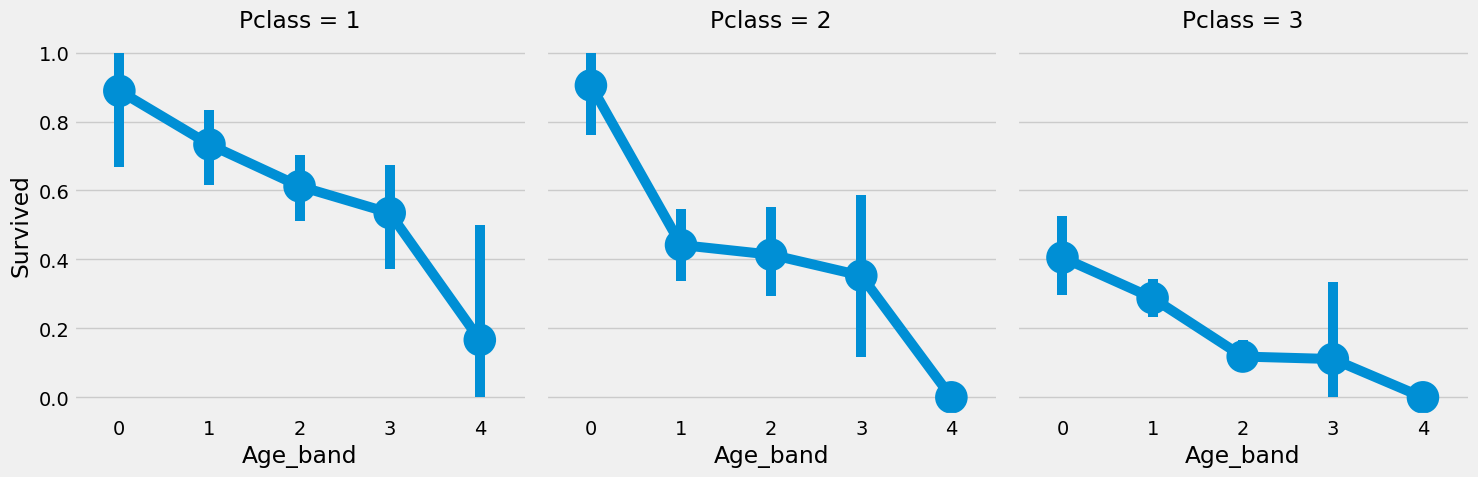

In [224]:
sns.catplot(x='Age_band', y='Survived', col='Pclass', data=data, kind='point')

### 家庭总人数

光看兄弟姐妹和老人孩子不太直接，我们直接看家庭总人数

In [225]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone'] = 1

In [226]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


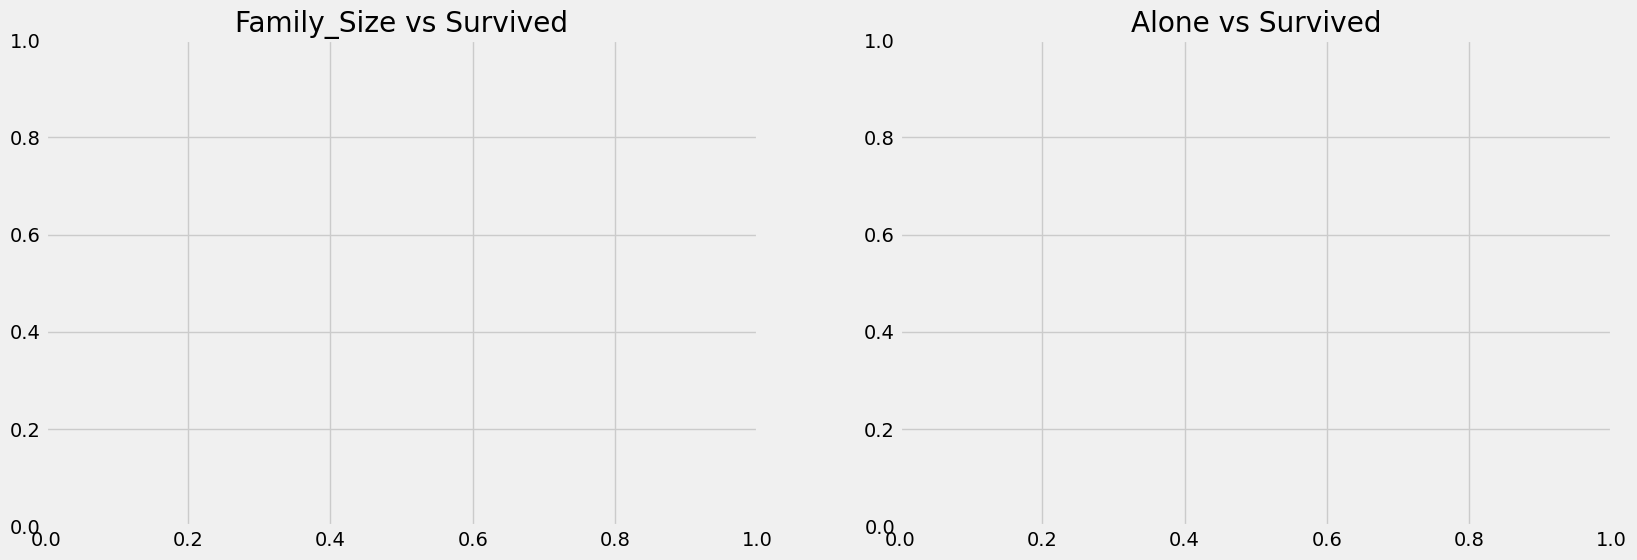

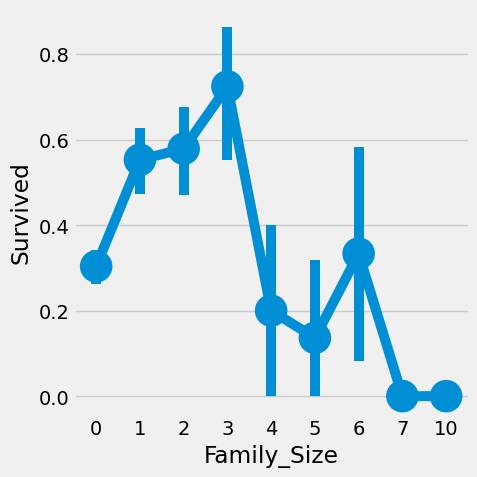

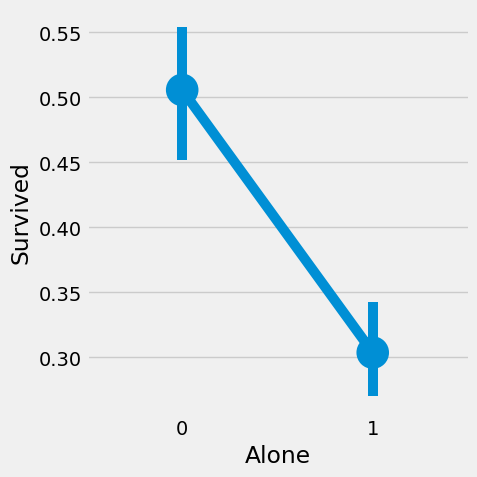

In [227]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.catplot(x='Family_Size', y='Survived', data=data, ax=ax[0], kind='point')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone', y='Survived', data=data, ax=ax[1], kind='point')
ax[1].set_title('Alone vs Survived')

plt.show()

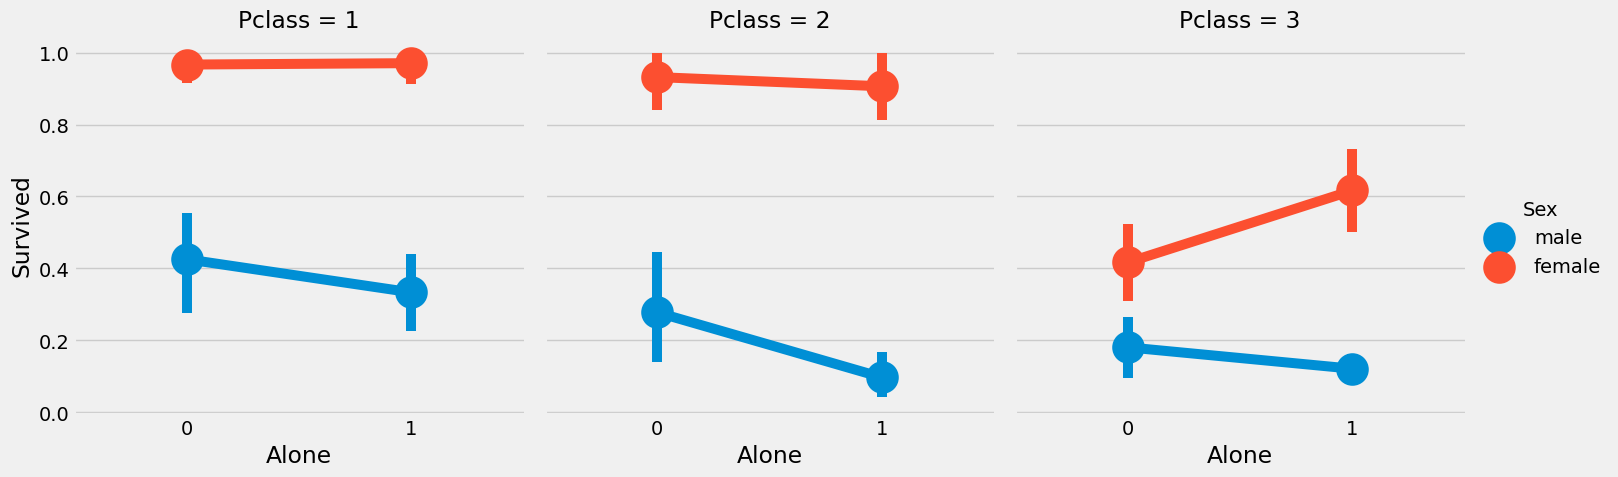

In [228]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')

### 船票价格

因为票价也是连续值，所以我们也需要将它转为离散值。

使用 pandas.qcut

In [229]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [230]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


可以看出，船票价格可以增加生存的机会。

In [231]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

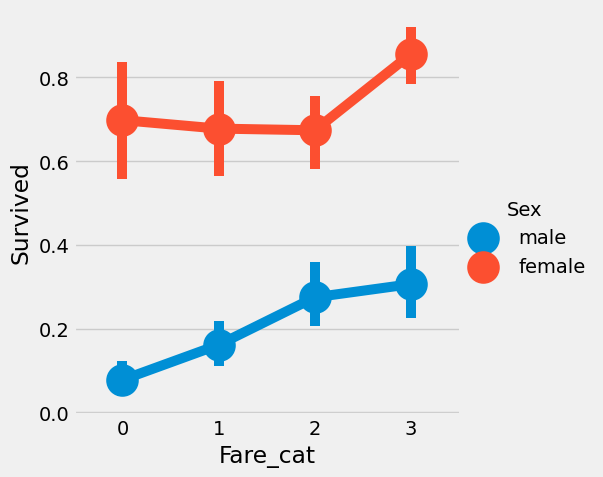

In [232]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')

显然，随着 fare_cat 的增加，存活的几率也增加，尤其是男性比较明显，这一特征可能成为建模过程中的一个重要特征。

### 将字符串转为数字

因为不能把字符串作为机器学习模型


In [233]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'other'], [0, 1, 2, 3, 4], inplace=True)

In [234]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### 去掉不必要的特征

- 名称，就是个字符串，没啥意义
- 年龄，年龄特征已经转为 Age_band 了
- 票号，任意的字符串，不能被归类
- 票价，已经转为 Fare_Cat 特征了
- 船舱号，没啥意义
- Fare_Range，我们已经有 Fare_Cat 特征了
- passengerid，没啥意义

In [235]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


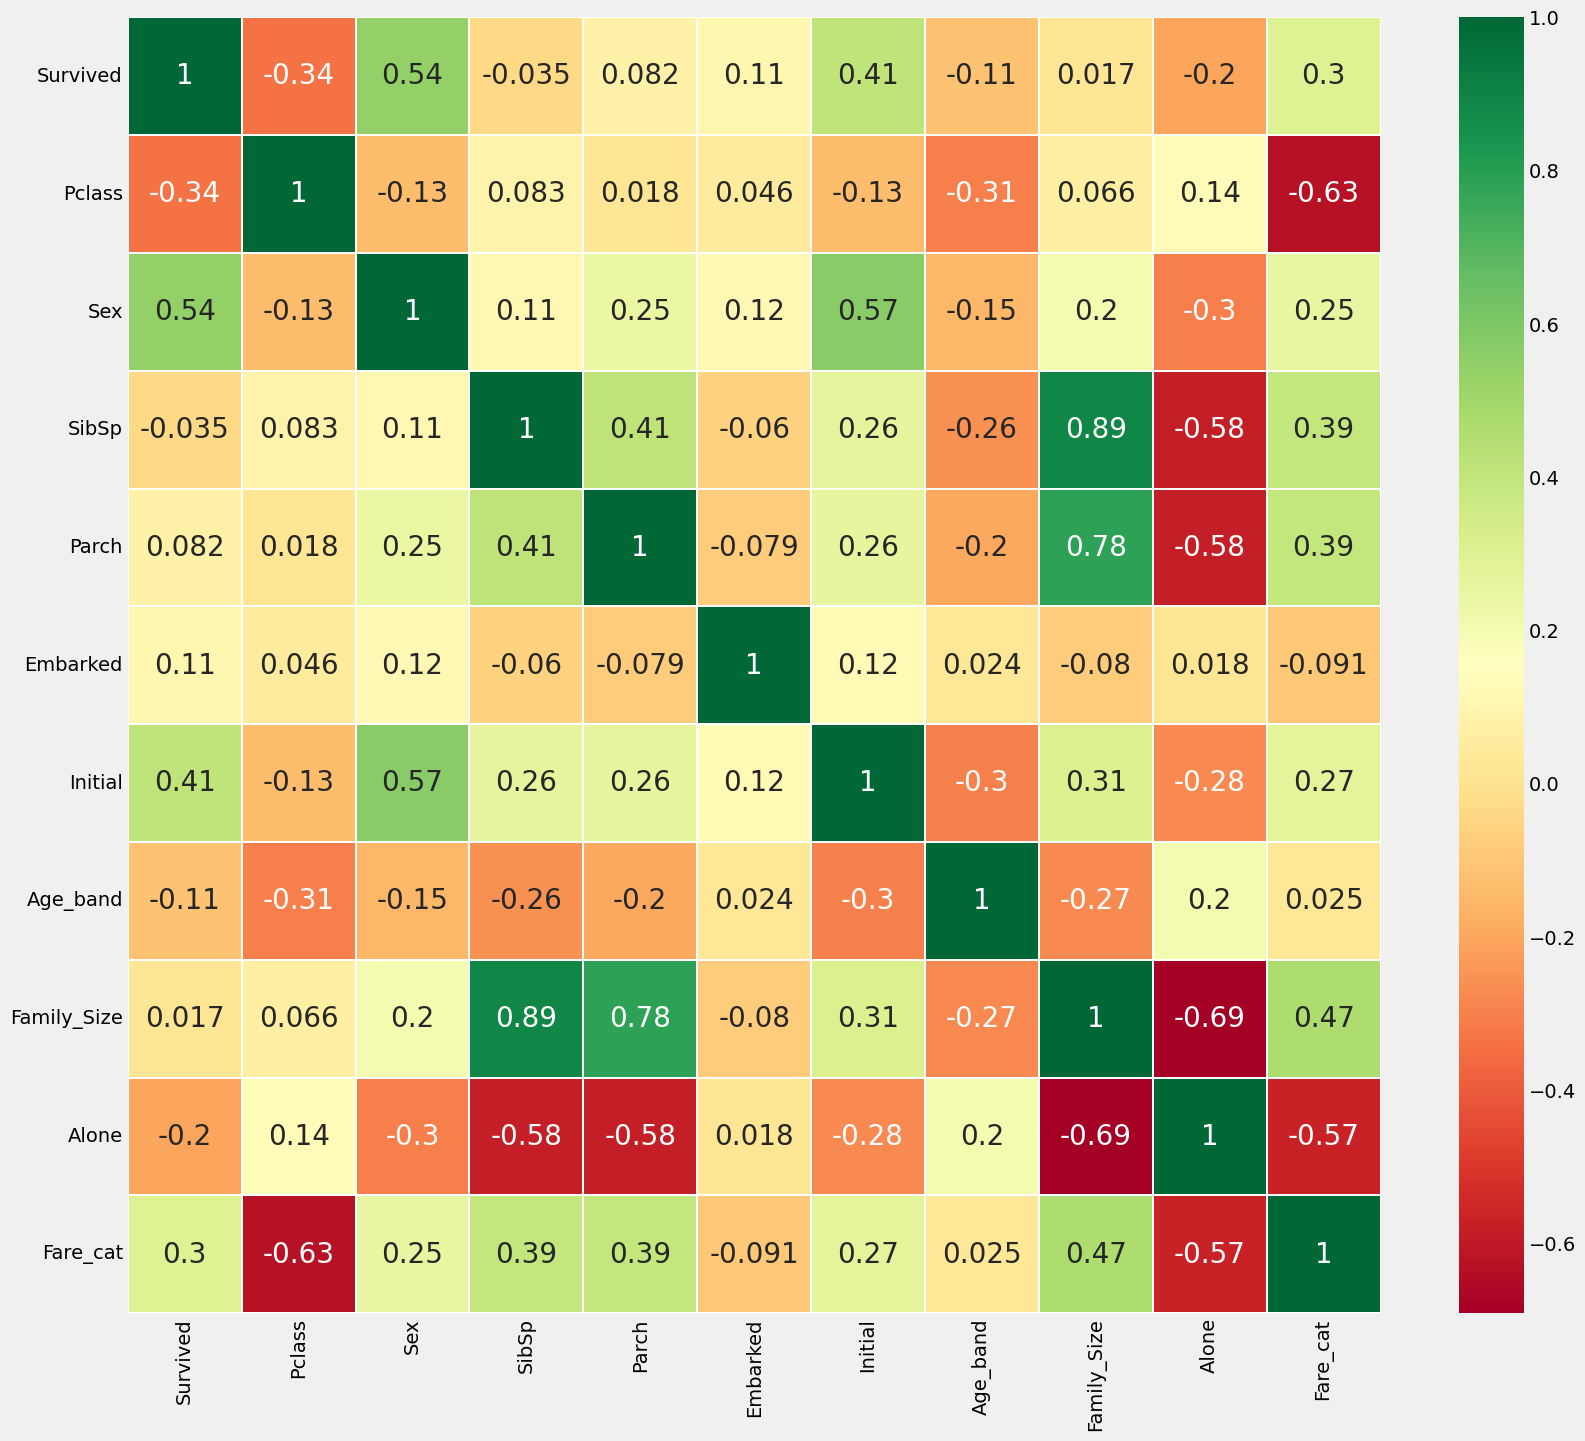

In [236]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 12. 机器学习建模

我们将使用一些很好的分类算法来预测乘客是否能生存下来：

- 1）logistic回归
- 2）支持向量机（线性和径向）
- 3）随机森林
- 4）k-近邻
- 5）朴素贝叶斯
- 6）决策树
- 7）神经网络

In [237]:
from sklearn.linear_model import LogisticRegression   # 逻辑回归
from sklearn import svm                               # 支持向量机
from sklearn.ensemble import RandomForestClassifier   # 随机森林
from sklearn.neighbors import KNeighborsClassifier    # k-近邻
from sklearn.naive_bayes import GaussianNB            # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier       # 决策树
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### 交叉验证

在使用训练集对参数进行训练的时候，经常会发现人们通常会将一整个训练集分为三个部分：训练集（train_set），评估集（valid_set），测试集（test_set）这三个部分。

因为在实际的训练中，训练的结果对于训练集的拟合程度通常还是挺好的（初始条件敏感），但是对于训练集之外的数据的拟合程度通常就不那么令人满意了。因此我们通常并不会把所有的数据集都拿来训练，而是分出一部分来（这一部分不参加训练）对训练集生成的参数进行测试，相对客观的判断这些参数对训练集之外的数据的符合程度。这种思想就称为交叉验证（Cross Validation）

### 多种机器学习算法模型效果

In [238]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,4,1,0,1,1
887,1,1,1,0,0,0,2,1,0,1,2
888,0,3,1,1,2,0,2,1,3,0,2
889,1,1,0,0,0,1,0,1,0,1,2


In [239]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

#### Radial Support Vector Machines(rdf-SVM)

In [241]:
# 实例化分类器
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
# 使用训练集训练
model.fit(train_X, train_Y)
# 使用测试集预测
prediction1=model.predict(test_X)
# 计算预测精度
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [242]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8022388059701493


#### Logistic Regression

In [244]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is 0.8208955223880597


#### Decision Tree

In [245]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is 0.8097014925373134


#### K-Nearest Neighbors(KNN)

In [247]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy of KNN is 0.8134328358208955


n_neighbors 默认值为5，我们试一下不同的 n_neighbors 值，对预测精度的影响

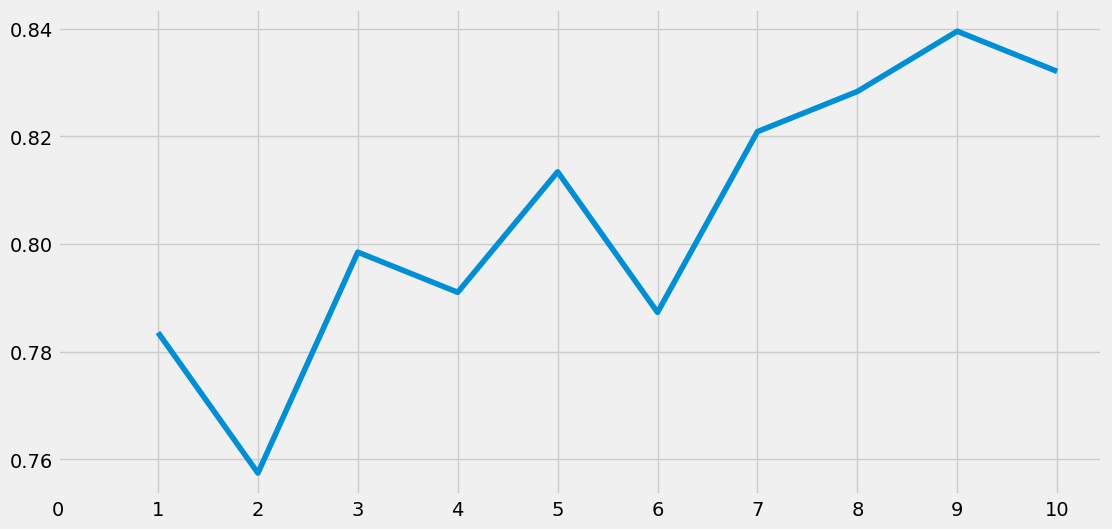

Accuracies for different values of n are: [0.78358209 0.75746269 0.79850746 0.79104478 0.81343284 0.78731343
 0.82089552 0.82835821 0.83955224 0.83208955] with the max value as  0.8395522388059702


In [248]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

#### Naive Bayes

In [253]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy of Naive Bayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy of Naive Bayes is 0.8097014925373134


#### Random Forest

In [252]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy of Random Forest is', metrics.accuracy_score(prediction7, test_Y))

Accuracy of Random Forest is 0.8171641791044776


模型的精度并不是决定分类器效果的唯一因素。

假设分类器在训练数据上进行训练，需要在测试集上进行测试才有效果。现在这个分类器的精度确实很高，
但是可以确认所有的新测试集都是80%吗？答案是否定的，因为我们不能确定分类器在不同数据源上的结果。

当训练和测试数据发生变化时，精度也会改变。

为了克服这一点，得到一个广义模型，我们需要使用交叉验证。

### 交叉验证

- 1）交叉验证的工作原理是，首先将数据集分成 k-subsets；
- 2）假设将数据集划分为（k=5）个部分，预留一个部分进行测试，而对其余4个部分进行训练；
- 3）通过在每次迭代中改变测试部分、并在其他部分训练算法来继续这个过程，最后对衡量结果求平均值，得到算法的平均精度

In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle=True)  # k=10, Split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models =[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear SVM,0.784607,0.056739
Radial SVM,0.823883,0.054169
Logistic Regression,0.800300,0.044713
KNN,0.811511,0.043388
Decision Tree,0.808115,0.046552
Naive Bayes,0.793583,0.051500
Random Forest,0.811486,0.048487


<AxesSubplot: >

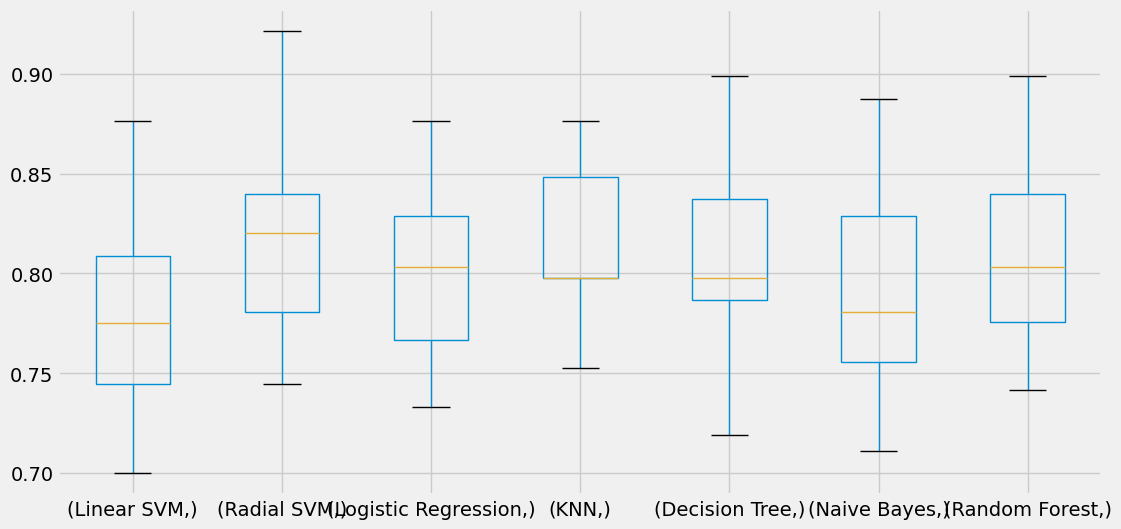

In [257]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

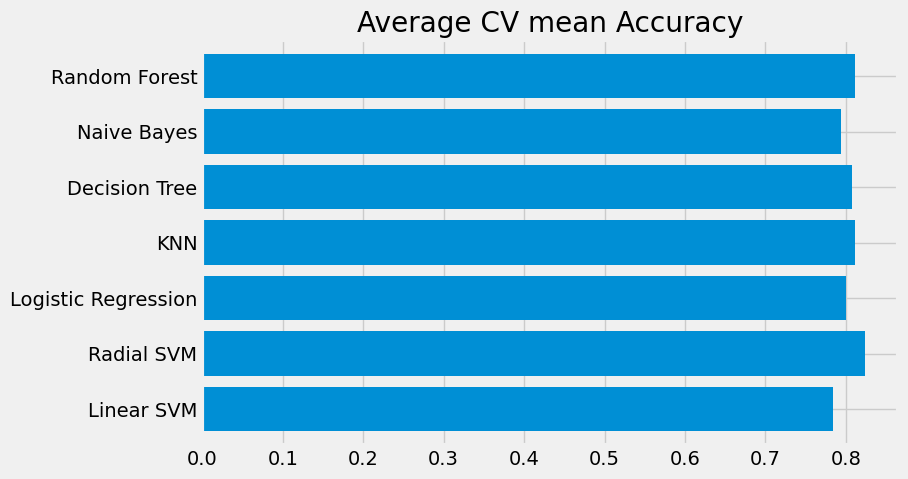

In [259]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

混淆矩阵： 给出分类器预测正确和不正确的数量

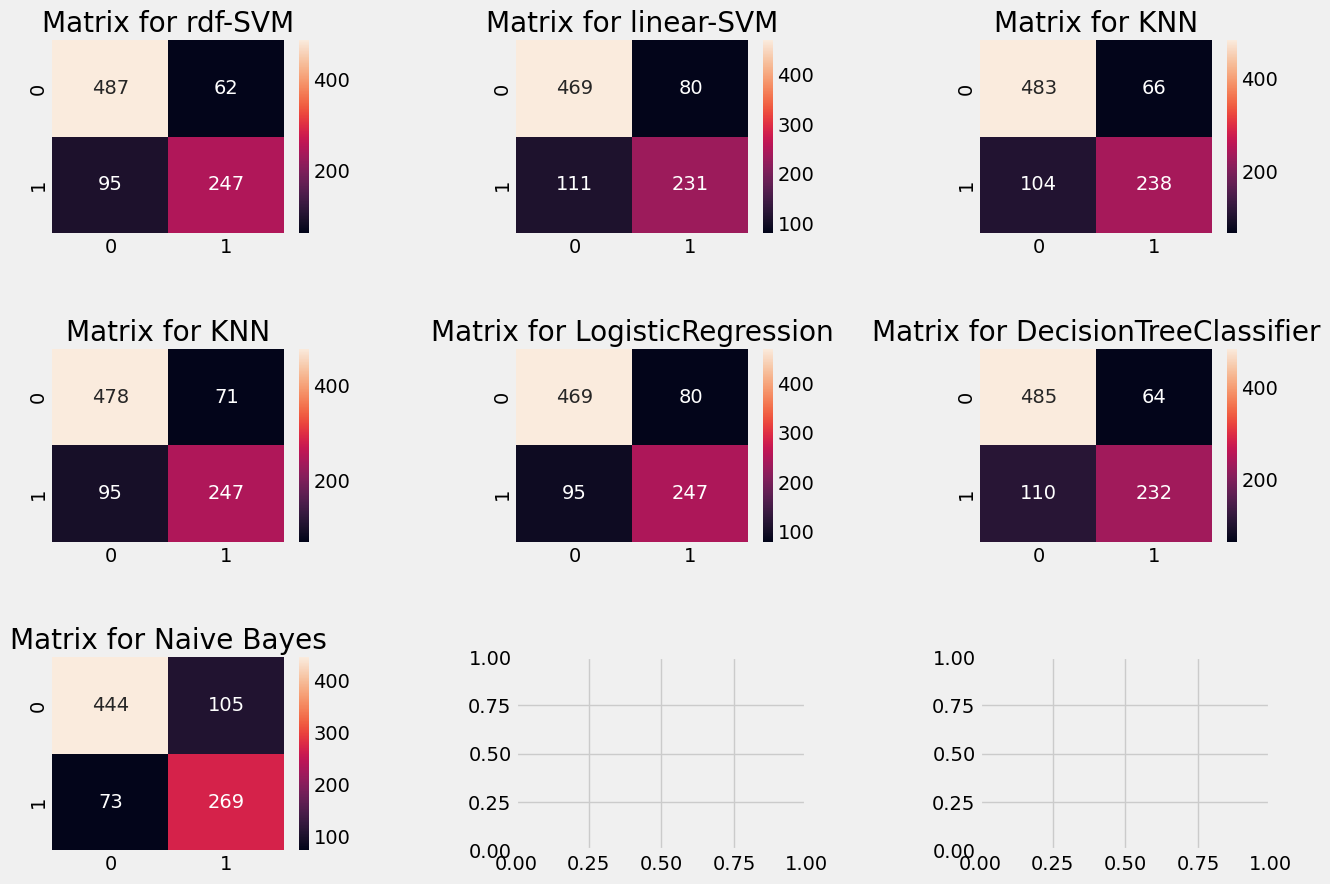

In [275]:
f, ax = plt.subplots(3,3,figsize=(14,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rdf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
                           
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')         

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for LogisticRegression')      

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for DecisionTreeClassifier') 

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes') 

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.show()